# Beyond Labels 
#### Classifying Morality in Reddit Comments through Reduced Supervision

Jennifer Caceres, Jenifer Vivar, Zoya Shafique, Ali Salem 

## Abstract
Analysis of how moral principles are conveyed in text is a developing and significant field. Examining online posts and comments can provide valuable insights into the changing moral values of society and potentially indicate instances of inappropriate behavior. However, current approaches to analyze morality in text rely on machine learning models and are limited in scope due to the unavailability of large scalled labelled datasets. As such, we propose to use reduced supervision where a largue corpus of labelled data is not required for training to analyze morality in text. To conduct this analysis, datasets of Reddit posts and comments were aquired, one which we collected ourselves by using a web crawler. Various unsupervised and supervised methods were employed to classify the morals in the Reddit comments. While many of the unsupervised approaches yielded valuable insights, they were not successful in accurately classifying the data. Using the Word2Vec embeddings only to classify the comments led to an accuracy of 17%. To overcome the challenges of the unsupervised appraoches, a pseudo labeling approach was employed, utilizing an LSTM neural network with a pre-trained GloVe embedding. The model performed outperformed the baseline and unsupervised methods, achieving an accuracy of nearly 97%.


## Introduction

Understanding the moral foundations that underlie human behavior is crucial for large language models and for deep learning at large as it allows us to develop more ethically-aware and responsible artifical intelligence (AI) systems. By analyzing moral foundations in text data, deep learning models can learn to make decisions that align with human values and ethical principles. This understanding enables the development of AI systems that can identify and address biased or harmful content, promote fairness and inclusivity, and make more informed ethical judgments. 

However, the developement of such AI systems is hindered by the lack of labelled data associating morals with text samples; collecting such data is a costly and labor-intensive process, and it is possible that the subjective bias of the annotator'w own morality leaks into the annotations. In the face of these problems, we propose to use reduced supervision to identify the underlying morals when only unlabeled text data or a very limited amount of labeled data is available. Our framework is built on Moral Foundational Theory [1], which presents a framework to understand the building blocks of morality. According to MFT, morals and ethics from different cultures all boil down to the same six basic principles: 

* care/harm, 
* fairness/cheating, 
* loyalty/betrayal, 
* authority/subversion, 
* sanctity/degradation, 
* and libery/oppression. 


We propose to employ reduced supervision methods such as unsupervised or semi-supervised approaches to identiy the aforementioned morality classes in text. By using reduced supervision, we can subvert the need for a large corpus of labelled text. On the other hand, training unsupervised methods can be more challenging compared to fully supervised approaches as it is difficult to create a loss function when there is no ground truth available. Furthermore, evaluating the model performance also poses a challenge. Therefore, in addition to unsupervised learning, we explore semi-supervised approaches to mitigate some of the challenges of unsupervised learning when a small sample of labelled data is available. 

Reduced supervision can be used either to directly classify the text samples or to use the classifications as proposed labels which can then be double checked by a human annotator and used to train supervised models. The advantage of the latter appraoch would be to take a lot of the manual labor out of the labelling process and make large scale datasets labeled for morality analysis more feasible. As such, reduced supervision can not only help us understand morality in text when annotations are not available but can also help us prepare large scale datasets. 

Our main contributions are 
* Unsupervised analysis of morals in text data using K-Means Clustering, Topic Modelling, and Word2Vec Embedding. These methods show promise for extracting the underlying in meaning in text but are heavily dependent on hyper-parameter tuning and have varying degrees of success in accurately classifying texts.
* A semi-supervised LSTM which achieves an accuracy of approximately 97% when trained on 2000 samples.

## Background 

Moral Foundational Theory [1] presents a framework for understanding the morals that underlie the human experience. According to this theory, morals judgments across countries and cultures are based on a set of innate morals that have evolved alongside humans. These innane morals consist of 

* Care/harm. This set of morals are related to virtues of kindness and compassion and, according to MFT, have developed from our evolution as social mammals who can feel the pain of others. 
* Fairness/cheating. The morals underlying ideas of justice, rights, and autonomy. Similar to fairness, is the idea of proportionality which emphasiszes equality. 
* Loyalty/betrayal. Developed from our evolution from tribal creatures, loyalty/betrayal is at the heart of our beliefs regarding patriotism and self-sacrifice. 
* Authority/subversion. This set of morals covers ideaologies related to leadership and respecting traditions.
* Sanctity/degradation. Related to our ideas of disgust and contamination, this set of morals forms the foundation for the common notion that the body is sacred and can be defiled by immoral actions and impurities. 

According to MFT, these morals are present across nations, cultures, and indivduals in varying degrees and give rise to the different virtues we see across the world. Specifically, MFT proposes that the varaition in the importance placed on these moral foundations is part of the moral diversity observed across the globe. 

Understanding moral foundation theory is valuable for deep learning methods aiming to analyze morality in text data. It provides a framework to explore how these moral foundations manifest in society and can be extended to recognizing morality principles in language, thereby enabling the development of deep learnign models which can detect and interpret moral content within text.

## Data

The Moral Foundations Reddit Corpus (MFRC) [2] was created by the Morality and Language Lab at the University of Southern California. Available on [HuggingFace](https://huggingface.co/datasets/USC-MOLA-Lab/MFRC), an opensource community for the development of artificial intelligence (AI), the MFRC contains 16,123 comments in English from Reddit from across 11 different subreddits. Each comment was annotated by at least three different annotators to fit into one of the following eight categories: Care, Proportionality,
Equality, Purity, Authority, Loyalty, Thin Morality, Implicit/Explicit Morality. Each comment is also labeled for how confident the annotators were in their labels. To make our predictions better, only values labels where the annotator was confident were used. Moreover, labels such as “thin-morality” or “non-moral” were ignored for the analysis. 


The second dataset was obtained by crawling Reddit’s "NoStupidQuestions" section. The comments on each posted question were saved into a dataframe for analysis. Such comments have no labels; this is the data that was used for the semi-supervised approach.

### Exploratory Data Analysis

In our exploratory data analysis, we aimed to understand the context of the reddit comments and the distribution of labels. Here we present the most relevant characteristics of the MFRC dataset. 

1. Context of Reddit Reviews

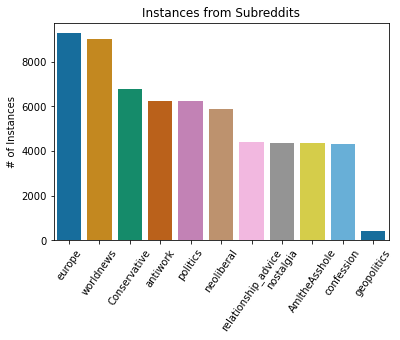

Above is a graph of the distribution of comments across 11 different  subreddits. A vast majority of the comments are from the 'europe' and 'worldnews' subreddits. In third and fourth place are 'Conservative' and 'antiwork'. Based on this, we expect that a majority of the comments will be related to political concepts and perhaps negative sentiments. We also analyzed the category of comments which is annotated as 'bucket' in the dataset. From the figure below, we see that the bucket with most comments is 'French politics'. 'French politics' leads by an overwhelming amount, implying that the data could be skewed more towards political concepts than providing examples for morals across the spectrum. 

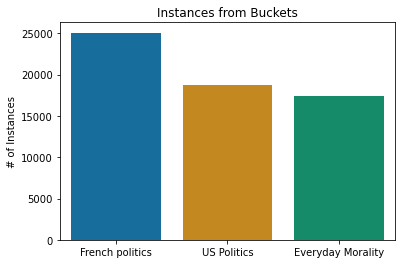

2. Analysis of Subreddits 

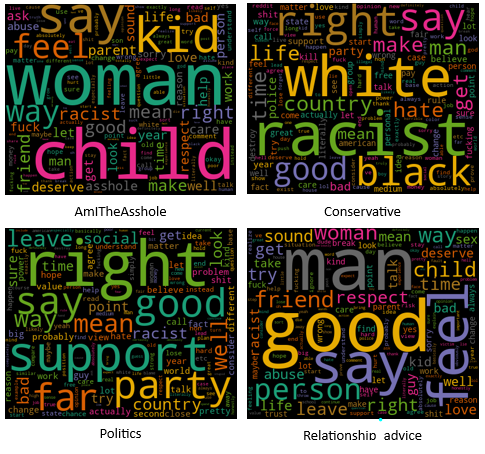

Above is the word cloud analysis for four of the subreddits. It is worth noting that there is considerable overlap between comments in each subreddit. For instance, right appears in both the 'Conservative' and 'Politics' subreddits. 'Good' makes an appearance in 'Conservative', 'Politics', and 'Relationship Advice'. As such, it does not seem that one subreddit is more inclined towards a specific morality or sentiment than others. Furthermore, it seems that there may be overlap between how different moralities are expressed in text.

3. Understanding the Distribution of Labels 

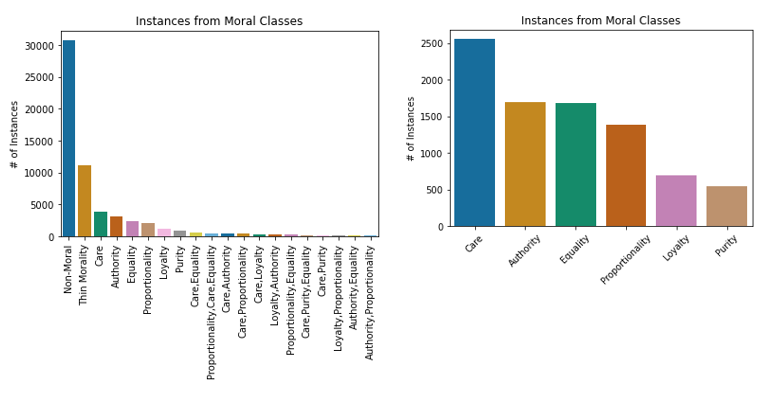

The original dataset is greatly unbalanced, with 'non-moral' outnumbering the other categories by a considerable amount, as shown above. Furthermore, there are many annotations such as 'Proportionality, Care, Equality' that only occur once. For our initial work, we discard comments with multiple labels and also discard the 'non-moral' and 'thin morality' categories. The resulting data is still class imbalanced, as shown on the right in the figure above. The 'care' category has almost 1,000 more reviews than the second highest category. We further balance the classes by dropping some rows with the 'Care' label. 

4. Confidence Labels. 

The MFRC dataset contains labels for how confident the annotators were in their annotations. This confidence level is self reported. As shown in the figure below, the number of confidently labelled comments is greater than the number of somewhat confidently or not confidently labelled comments. For our analysis, we only keep comments that were labelled with full confidence. 

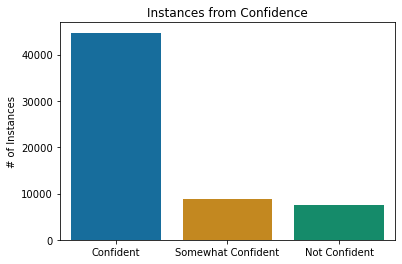

### Data Preprocessing 

#### Data Cleaning

As we are working with text data, we have to vectorize the Reddit comments to input into our models. To do so, we first clean the data by 

* standarding the characters to all lowercase letters
* removing punctuation and extra white space
* removing any URLs or non-English words
* removing numerical digits 
* removing '/r/' and 'op' words which are specific to Reddit.

#### Data Vectorization

After cleaning the data, we use the python Spacy libray to lemmatize the words. Lemmatizing converts words into their stems so that 'helped' and 'helping' both become 'help'. This helps reduce the size of the feature space after vectorization. With the data lemmatized, we tokenized the data and used Word2Vec to convert the tokens into vectors. All of the models used took in the vectorized tokens as input.

## Methods

We attempted both semi-supervised and unsupervised methods for our project. Below, we detail the main steps involved in each method as well as the model architecture for the self-supervised method. We also report baseline accuracy scores using a Random Forest. 

### Baseline Approach 

To gain an understanding of how a simple machin learning baseline would perform on the morality classification task, we utilized a Random Forest. The Random Forest was fine tuned using Grid Search from SKLearn. As seen below, the random forest achieved an accuracy of only 13% and obtained fairly low F1-Scores for all classes. Notably, as the dataset is balanced with five classes, the Random Forest fails to beat a random baseline of 20% as well. 

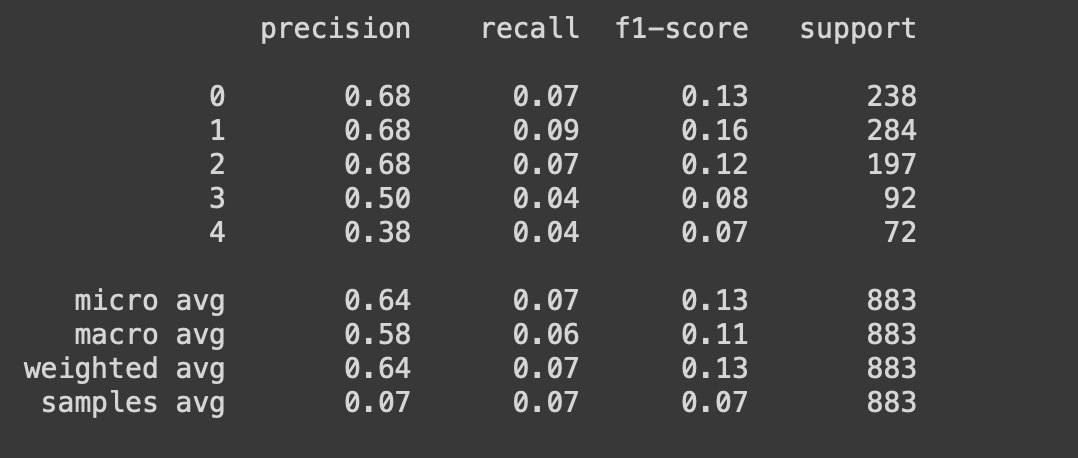




### Unsupervised Approaches 
1. Embedding Space

Embedding Space is a foundational concept in deep learning that allows us to represent complex data in a simple way. This method learns to represent data points in a higher-dimensional space. In an unsupervised way, we used embedded space to automatically labeled data without relying on explicit labels or annotations. \\
The embedding space method is a mathematical representation where words or documents are transformed into dense vectors, capturing their semantic relationships and contextual meaning. These vectors, in our case, are learned through unsupervised deep learning models, such as Word2Vec. By using this method, we can measure the similarity between words or documents based on the proximity of their corresponding vectors. 
By using the Word2Vec model, the algorithm learns words associated with any dataset, in this case, our Reddit dataset. Using the Reddit dataset we first took out ‘stopwords’ – words that are very common English words. Such as, I, am, or, on, and etc. Not only did we remove any stopwords, we removed html and url components, and replaced negation words into two words.[3] \\
Once the the dataset was lemmatized, we convert the lemmatized data into a vector, labeled tokenized_vectors, as seen in the table below. This will allow for vocabulary creation, text normalization, input representation, efficient training, and control over the vocabulary size. It even allows for a smooth, and easy performance. 
![table](https://drive.google.com/uc?export=view&id=1EwGarUB18-_TfYBf6aQlNNgRgVHX_j1L)

Using the tokenized_vector we proceed to train the dataset using the Word2Vec model, which results in a set of word embeddings. These word embeddings capture the semantic meaning and relationships of words. This way we can detect synonymous words or suggest additional words for a partial sentence. The trained data will be stored in the variable labeled ``` key_vectors```.

```
keyed_vectors.most_similar(positive=['care', 'harm'], negative=[], topn=15)

```
Using the ``` most_similar() ``` function, we used it to check and retrieve the most similar words, in this case will be the moral foundations. The positive parameter specifies the positive words. In this case the positive words are  the virtues and vices associated to moral foundations. Which indicates that we want to find words similar to the concept of both virtue and vice.

```
virtue_vice_concepts = [words that are strongly associated to the specific moral foundation] 
moral_concepts = [concept for concept in virtue_vice_concepts if concept in keyed_vocab]

```
We define a list called ``` virtue_vice_concepts ``` which contains a collection of words associated with concept of the certain virtue and vice. The purpose is to filter out the words that are present in the vocabulary of the Word2Vec model, represented by ``` keyed_vocab ``` . This will result in new list ```moral_concepts ``` which contains only the words that can be used when calculate similarity score.

```
    target_tokens = [token for token in target_tokens if token in keyed_vectors]

    doc_tokens = [token for token in doc_tokens if token in keyed_vectors]
    
    if not (target_tokens and doc_tokens):
        return 0.0
    else:
        similarity_score = keyed_vectors.n_similarity(target_tokens, doc_tokens)
        return similarity_score
```
In order to calculate similarity score, we calculate the similatiy score between two list of vectors. First we create two lists that kekeeps only the words that exist in the vocabulary in the ``` keyed_vectors```. It ensures that only tokens present in the keyed_vectors vocabulary are used for similarity calculations. If there is no vocabulary that exist in both the tokenized_vector and moral_concepts the return will be zero, as there is no similarity. However, use the function ```n_similarity``` we take the 
cosine similarity between a tokenized vector and a moral foundation vector as a measure for the similarity, which is calculated as the dot product between the two vectors normalized by their norms. In the moral context a cosine similarity close to 1 indicates that the tokenized vector is semantically. On the other hand, if the result is close to 0 indicates that the tokenized vector and the moral foundation component is not semantically related. This is done for each moral foundation. \\
Once the similarity score, for all the moral foundations, are calculated. Next is assign a moral label to it. The way this is done by taking the highest score of the moral foundations and assigning that labeled. 
```
How the labeling looks like:
 Care/harm --> 0
 Fairness/cheating --> 1
 Loyalty/betrayal --> 2
 Authority/subversion --> 3
 Sanctity/degradation --> 4
 Liberty/Oppression --> 5
```
For instance, taking a look at the row below the highest score between the overall_care to overall_lib will be over_auth. We will return assign 3 to that row. This method so applied to each row and it ran successfully.
![row](https://drive.google.com/uc?export=view&id=1DUkNx9QdPZVutCSBS1L3SeTN4KqrYvSJ)





2.  K-Means Clustering

We employed K-means clustering as a technique to explore the possibility of clustering the Reddit comments based on their underlying moral foundations. By applying K-means clustering to the dataset, we aimed to uncover distinct groups that exhibited similar moral patterns, providing insights into the latent moral structures present in the data. Although this approach allowed us to identify potential associations and relationships between different texts the associations were not always based on shared moral characteristics. To refine our results, we clusted on the

* Word2Vec embeddings 
* Top n PCA components of the Word2Vec embeddings and 
* Term frequency inverse document frequency (TF-IDF) embedding. 

We also applied latent sentiment analysis to uncover the hidden topics in the comments. These methods all had limited success due to the large overlap of topics. We evaluated our clusters based on the Davies-Bouldin index (DBI) and the Callinski-Hrabasz index (CHI). The DBI measures the average similarity between clusters by comparing the distance between clusters with the size of the clusters themselves. As such, a lower DBI implies more separation between clusters and therefore more distinct groups. The CHI, on the other hand, measures not only how well separated the clusters are but also how uniform and similar the clusters are within themselves. Therefore, a hgiher CHI indicates better-defined and more compact clusters. The table below compares the DBI and CHI for all three methods. As can be seen, clustering on the PCA components achieved the lowest DBI and the highest CHI. As clustering on the top n PCA components leaves us with only the most important features, it is not surprisng that the PCA clustering has the best separation between clusters and more inter-cluster variance. 

| Model              |       DBI    |     CHI    |
| :--- :             |    :----:    |      :---: |
| Word2Vec Embedding |    3.94      |  129.20    |
| PCA Components     |    3.67      |  147.20    |
| TF-IDF Embedding   |    10.78     |  29.62     |


On the other hand, it is very difficult to relate the PCA components back to the word embeddings as we do not know which words make up which components and have no way to map the components and words on to each other. This leads to a loss in granularity and makes classifying the algorithm's ability to identify morals in text difficult. As such, it is not ideal to cluster based on PCA components as the results are not interpretable. 

In general, clustering on the Word2Vec embedding groupped individual words into clusters. It proved difficult to map these words back to the moral principles without manual preconditioning. The TF-IDF embedding had the highest DBI and the lowest CHI among the three methods. Values for k and n were chosen through scree plots and analyzing the explained variance after PCA decomposition, respectively. 

## Semi-Supervised Approach
Pseudo Labeling
<br>
The semi-supervised approach used in this project is based on the work done by Lee (2013). The paper explains that a model can achieve high accuracy by creating two models. The first model will be trained with labeled data and new pseudo-labels will be created from this model. The model is trained in batches and the pseudo labels are created by batches as well. The loss is monitored by an alpha function, which regulates the impact the pseudo labels have on the loss function.

In this project, a deep neural net, consisting of an embedded layer, an LSTM layer, and a dense layer consisting of 300 nodes was created. To measure the accuracy of the approach a new model was created. The second model has the same structure described before. The new model had the weights from the old model loaded and it was then trained and tested using the available labeled data. The image below shows the model implementation used in this project. The model was trained first using only 800 labels, then 1500, and then 2000. This was because we wanted to see what the performance would be if we had less labeled data available. To avoid overfitting a new model is created and the test labeled data is used to measure the performance. The alpha function used here has a direct impact on the accuracy of the test data. 

The accuracy of the data was better when more labels were used. This makes intuitive sense. 




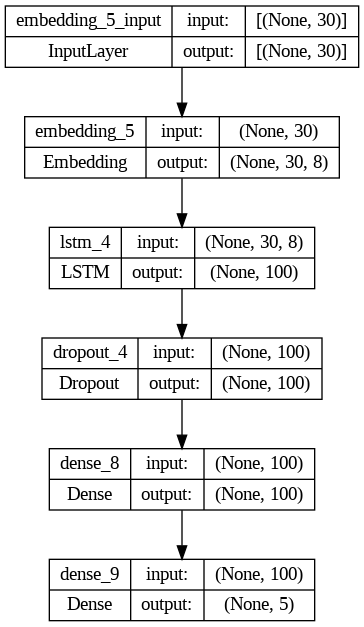

**Figure shows the structure of the DNN use in this project**



---

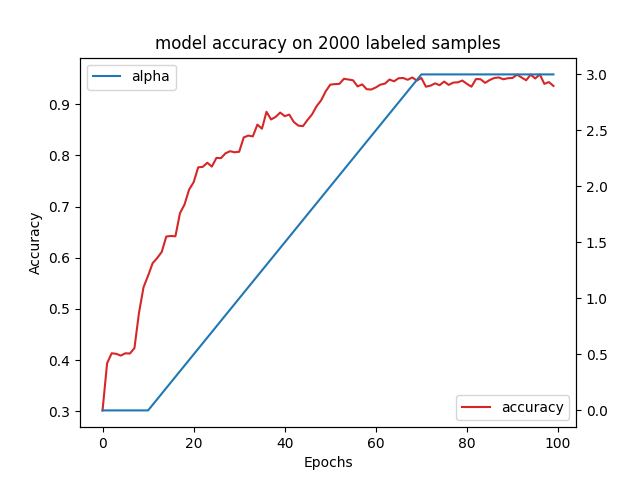

**Figure shows the way the test accuracy of the model follows the alpha function**

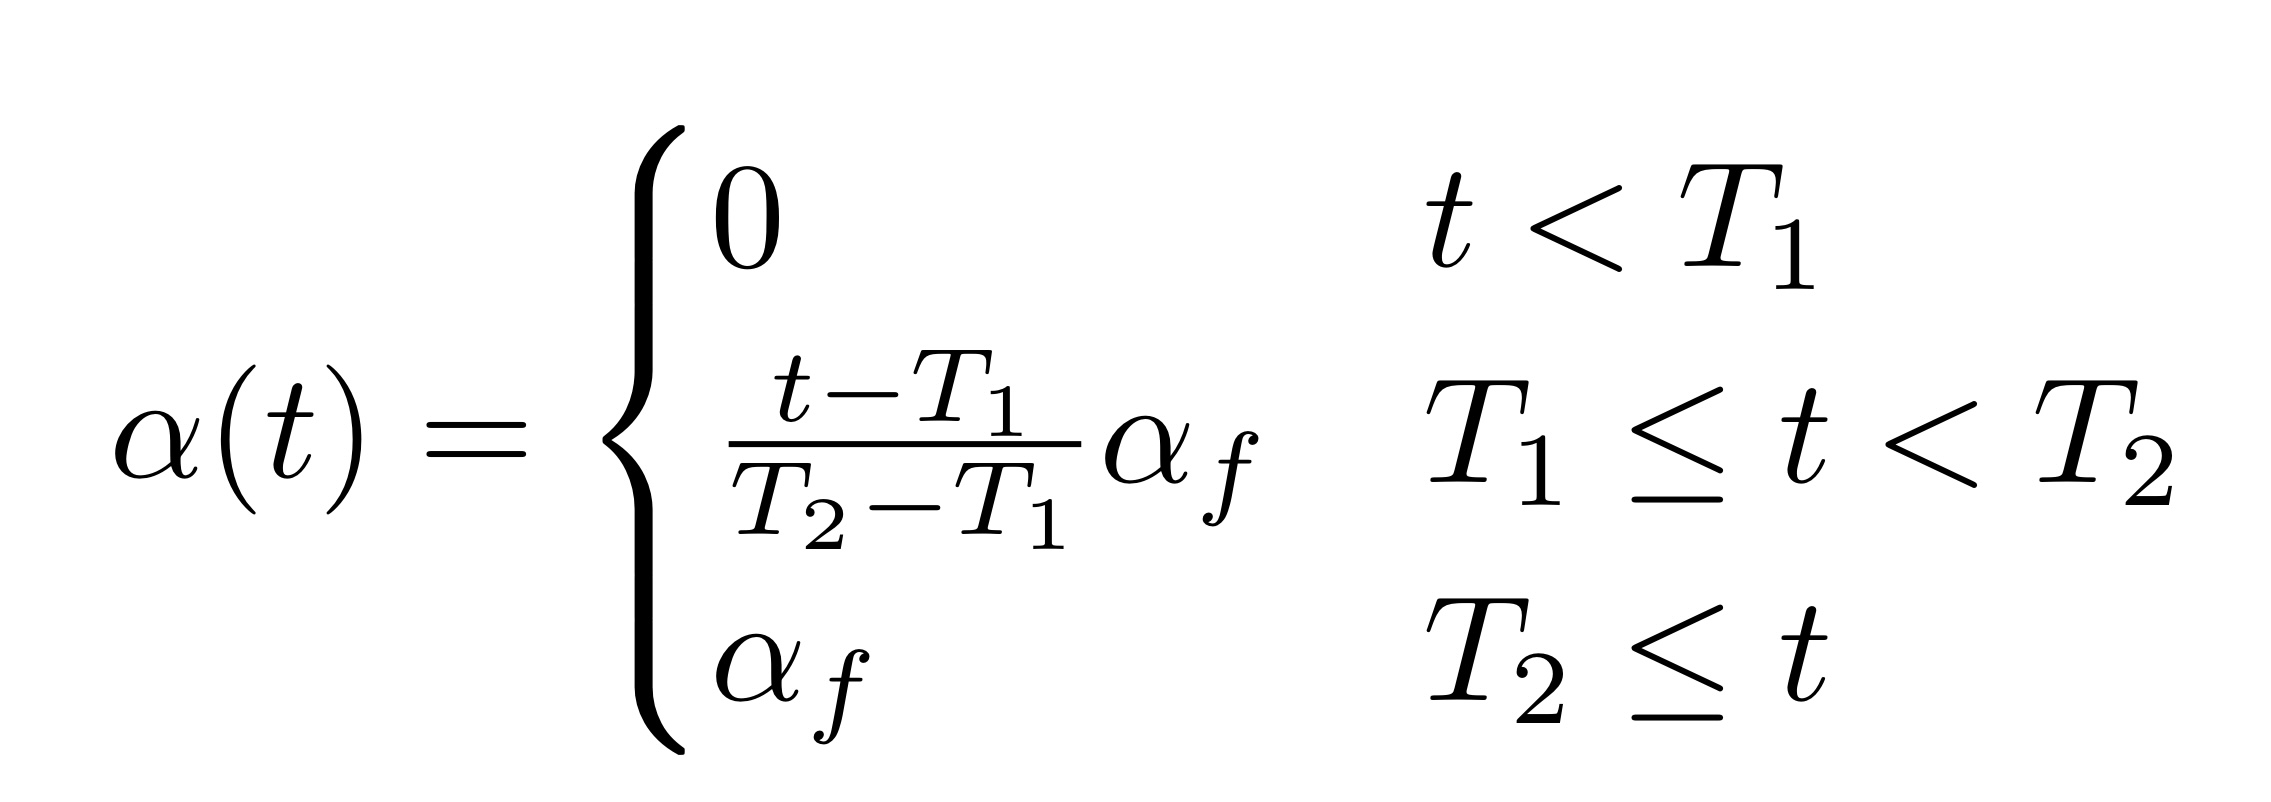
**Alpha function suggested by Lee (2013) to control the loss when training with pseudo labels. The t stands for the number of epochs, T1 and T2 are the intermidete number of epochs to pass before adjusting alpha. In this case T1 was 10 and T2 70 for 100 epochs. The $ \alpha_{f}$ was a predetermined value used by Lee.**

Below, the exploration of the labeled and unlabeled data was done with t-SNE. The purpose was to see how the distrobution look in 2D.

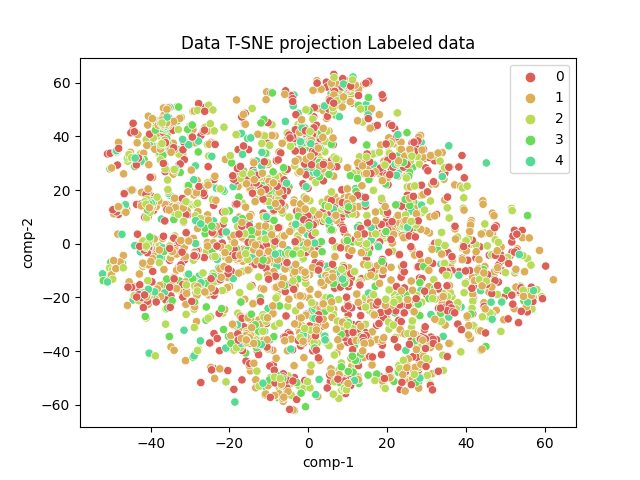

**t-SNE plot  for the labeled data 
Care    = 0 
Authority   = 1
Equality    =2
Loyalty      =3
Purity       =4**

Now we're looking at the same t-SNE plot but now containing the pseudo labels added at every training with n labeled samples. The distribution looks similar to the labeled data, which was expected. It is notice that many of the psudo labels in this sample seem to have a majority of 1 or 



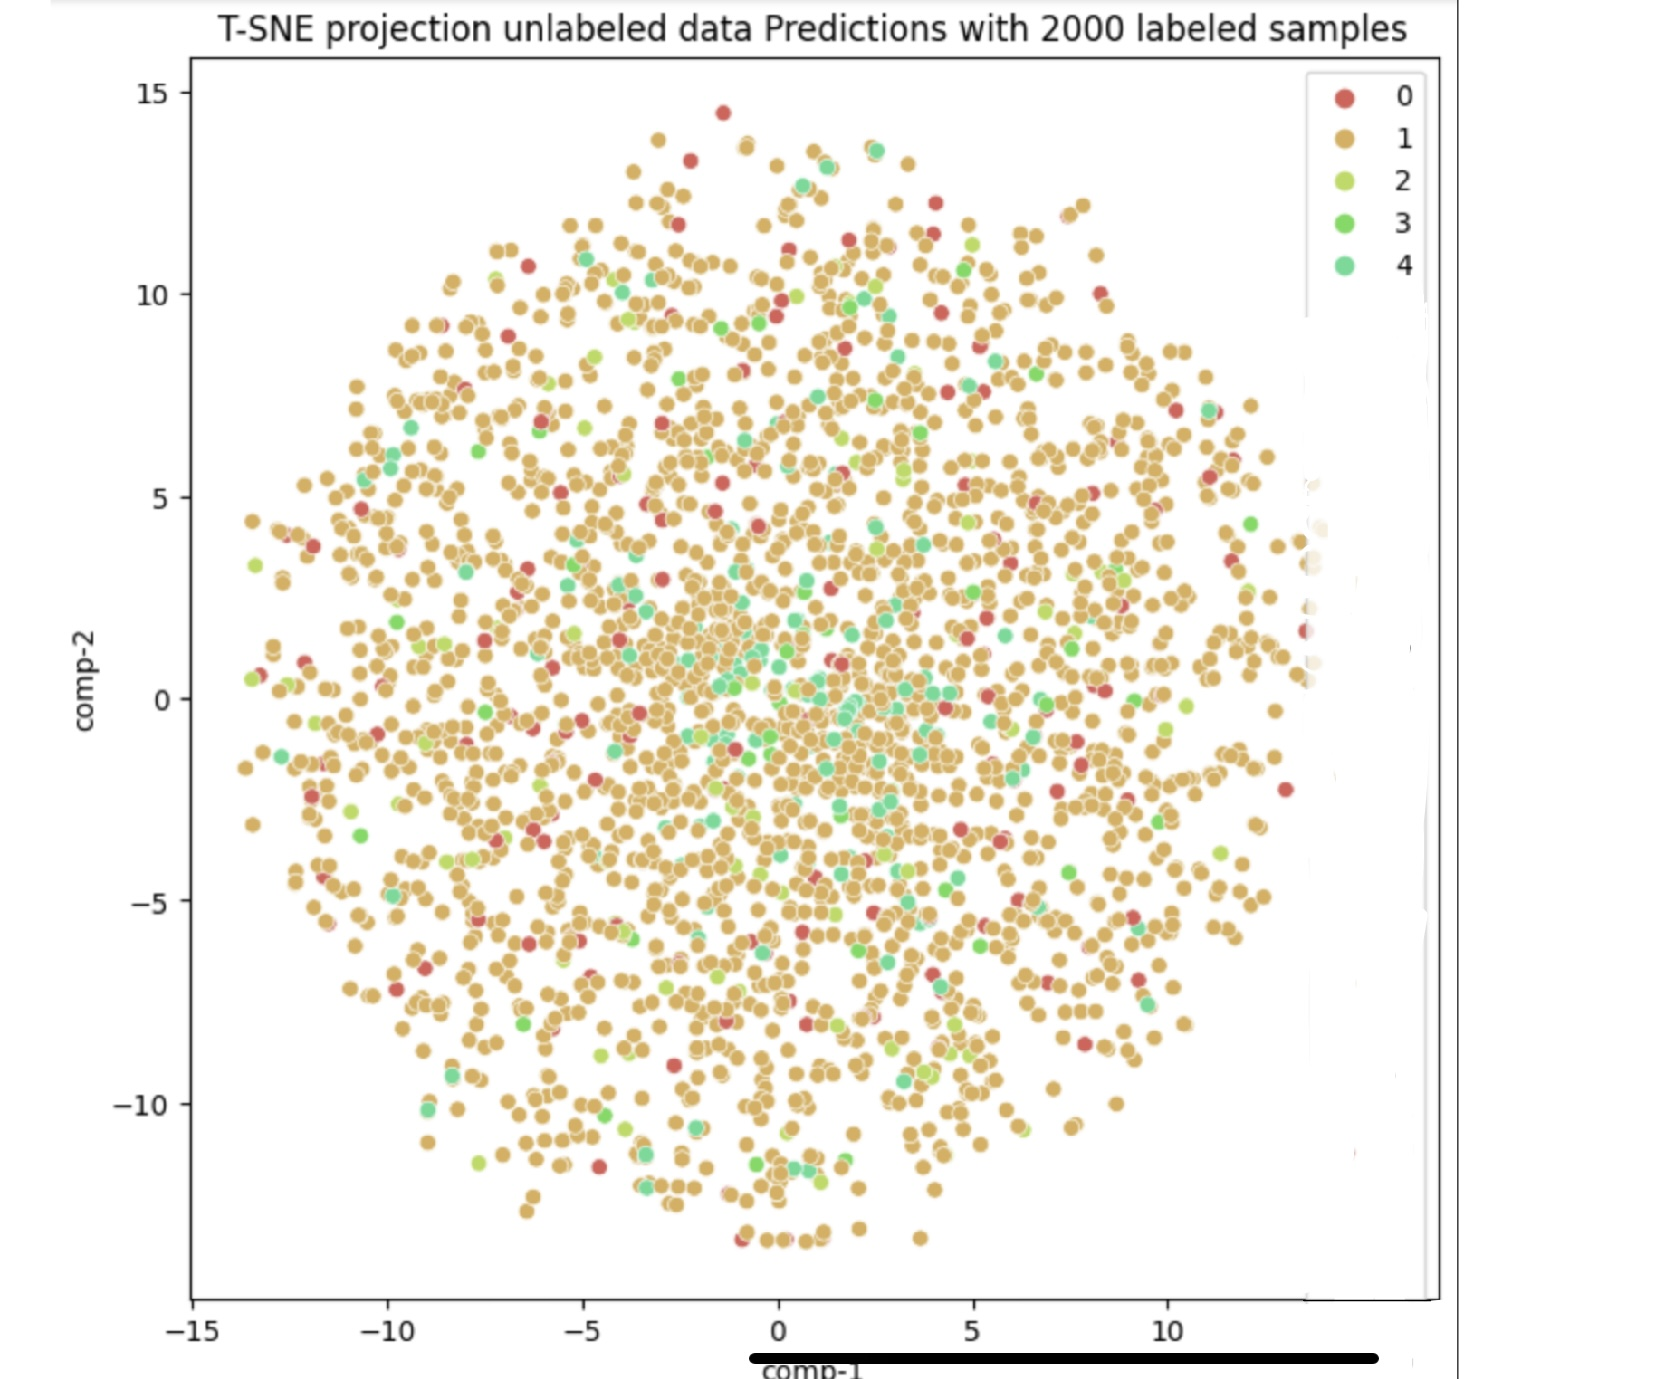

below is a sample of the pseudo labels assigned to the unlabeled data. While some values such as care/harm make sense, this was overpredicted on the dataset. More time is needed to see if this is due to the nature of the data. There were many comments gather from a question about down syndrome, but this neesd to ge further investigated.


text: ['bill' 'fold' 'origami' 'someth' 'need' 'go' 'back' 'clear' 'could' 'ride' 'consciou' 'bud' 'better' 'check' 'make' 'sure'] with labeled: `Care/harm`

 text: ['lol' 'two' 'year' 'yoga' 'seminar' 'self' 'care' 'need' 'call' 'themself' 'therapist'] with labeled: `Care/harm`

 text: ['dead' 'rot'] with labeled: `Care/harm`

 text: ['think' 'make' 'excel' 'comparison' 'undisplay' 'art' 'take' 'next' 'step' 'imagin' 'digit' 'money' 'use' 'gold' 'coin' 'paper' 'mostli' 'digit'] with labeled: `Care/harm`
 
 text: ['counselor' 'hard' 'come' 'fact' 'town' 'two' 'three' 'univers' 'offer' 'counsel' 'program' 'christian' 'unaccredit' 'prevent' 'graduat' 'obtain' 'state' 'licens' 'field' 'need' 'regul' 'higher' 'educ' 'standard' 'opinion' 'also' 'counsel' 'phd' 'student' 'bias'] with labeled: `Authority/subversion`

## Evaluation

For our evaluation, we compare the embedding space baseline with the semi-supervised approach. As the KNN could not be extended to class labels, we do not compare the clustering to the aforementioned models.

### Embedding Space
Once we labeled all the reviews in the Reddit dataset, calculated the accuracy and F1-Score of the model. We calculated the accuary score in a balanced dataset. The results are shown in the table below.

![table1](https://drive.google.com/uc?export=view&id=1AWIbcbkcNAKTh1MlKLfPFddqzl05bo__)

As it can be seen the accuracy score is about 17%, therefore outperforming the Random Forest.  

### Semi-Supervised Approach 

The semi-supervised approach obtained a 97% accuracy when training on only 2,000 samples. However, as mentioned above, when extended to predict on unlabelled data, we see that the model overpredicts the 'Care' category. Further exploration of the data is required to assess why this is the case and if the labelling is accurate on the completely unlabelled Reddit comments.

| Model              |  Accuracy    |   F1-Score |
| :--- :             |    :----:    |      :---: |
| Semi-Supervised LSTM |  97%       |      --    |
| Word2Vec Embedding   |    17%   |  17%  |
| Random Forest   |    13%     |  11%     |


As shown in the table above, the semi-supervised LSTM outperforms all other methods.

## Conclusion

As deep learning models continue to gain popularity and become increasingly incorporated into every day life, it is important to ensure that these models are fair and align with human moral principles and virtues. However, teaching models to recognize human morality and virtues is a challenging task not only due to the complex nature of human morality but also due to the amount of data available. Text data exists in abundance through all the open source books, social media, and other websites across the internet, yet, very little of this text is labelled with respect to morality principles making it nearly impossible to use traditional supervised appraoches for morality classification. As such, we proposed to use reduced supervision methods to classify morals in text data on the basis of Moral Foundational Theory. 

Among the various methods explored, the semi-supervised LSTM was the most effective. By combining limited labeled data with a large amount of unlabeled data, this method demonstrated superior performance in morality analysis. The incorporation of both labeled and unlabeled data allowed the model to learn from the available labeled instances while also leveraging the vast amount of unlabeled data to extract additional insights.

On the other hand, the unsupervised approach, particularly the use of K-Means (KNN) clustering, proved challenging both to interpret and to extend back to moral principles. While KNN clustering effectively grouped similar words from the comments together, the direct translation of these clusters into meaningful moral principles proved to be difficult. The Word2Vec embedding proved easier to interpret but relied on manually assigning words to each moral class. 

In summary, the semi-supervised LSTM proved the most successful in morality analysis of Reddit comments. By combining labeled and unlabeled data, the semi-supervised LSTM surpassed the other unsupervised approaches while using only 2,000 samples for training. This showcases the potential of semi-supervised methods for extracting valuable insights for moral values in text. On the other hand, further research and development are needed to address the interpretability challenges associated with unsupervised methods such as KNN clustering. 

## Appendix 

We pivoted our project direction multiple times from first working on Yelp Reviews, to then working on Twitter data from politicians and books from Project Gutenberg, and finally to the Reddit data. We highlight analysis related to Project Gutenberg here. 

### Supervised Approach for the Project Gutenberg

In this part, We first pre-processed the data from the project Gutenberg text books (randomly) using Spacy and other methods.
Using Bag of Word, we applied supervised models such as Naive Bayes, Logistic Regression, Decision Tree, Random Forest, KNN, SVM and Gradient Boosting, including GridSearchCV.

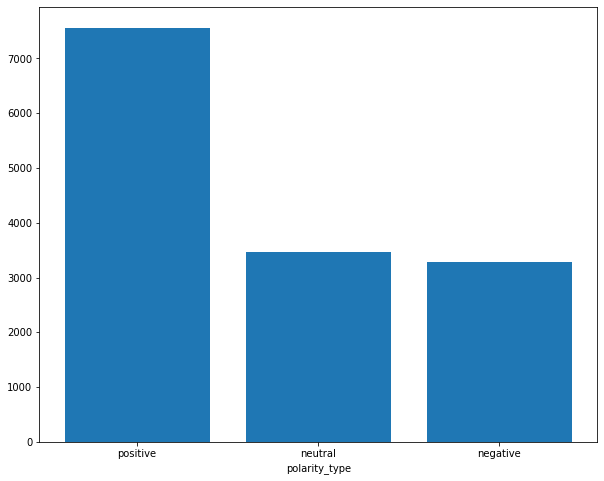

Different algorithms were employed to develop a classification model, and the one with the greatest AUC or Gini score was chosen. These algorithms included Logistic Regression, Naive Bayes, Decision Trees, Random Forest, and Gradient Boosting Trees.

The Multinomial Naive Bayes algorithm, which provides the greatest Gini value in the shortest amount of time, is the best algorithm to employ for developing an NLP model among several others. To put it another way, the Naive Bayes algorithm is excellent at processing NLP.

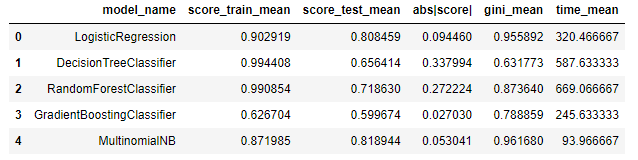

### Unsupervised Approach for the Project Gutenberg
In this part we used LSA, LDA and NNMF, to cluster ten moral words (with their highest loading) for each topic modeling. These 3 algorithms (LSA, LDA, NNMF) are usually used with TF-IDF technique.

Latent Semantic Analysis (LSA) is a technique used for dimensionality reduction and uncovering latent semantic patterns in text data. Latent Dirichlet Allocation (LDA) is a probabilistic generative model used for topic modeling. It assumes that each document is a mixture of multiple latent topics, and each topic is characterized by a distribution of words. Non-Negative Matrix Factorization (NNMF) is a dimensionality reduction and matrix factorization technique that is often applied to non-negative data, such as term-document matrices in text analysis.

LSA is less common than the LDA and NNMF algorithms. Compared to LDA, NNMF offers more coherent themes and takes less time to execute. For clustering using unsupervised techniques, the GMM algorithm with silhouette score and the KMeans algorithm with elbow approach are both used. However, it was not possible to achieve the ideal number of clusters.


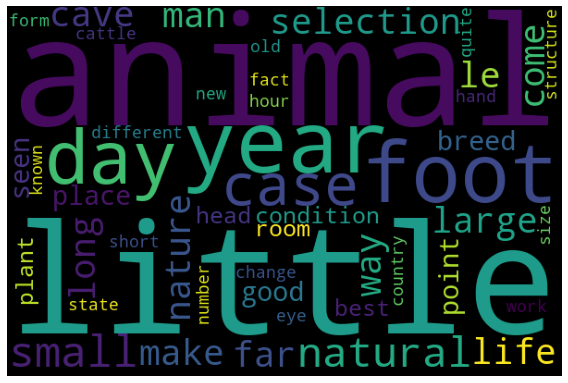
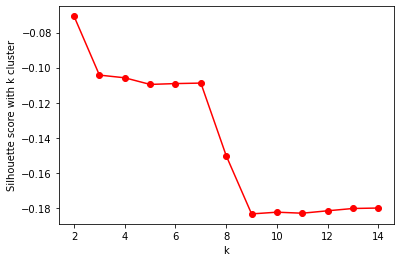


When using the MultinomialNB model with the three approaches Bags-of-Words, TF-IDF, and Word2Vec, we can find that Word2Vec offers the worst performance (lowest Gini score).

We used WordCloud to determine which words representing the text corpus of the whole document and generated the word cloud for all texts.

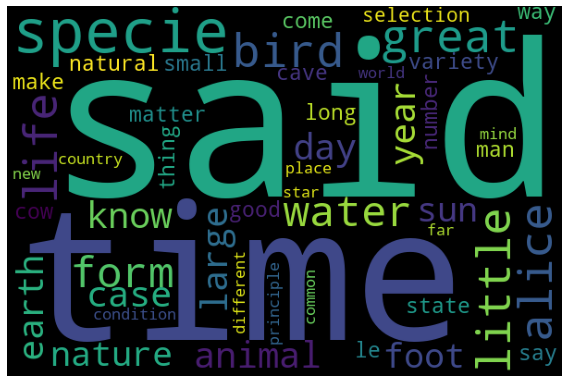

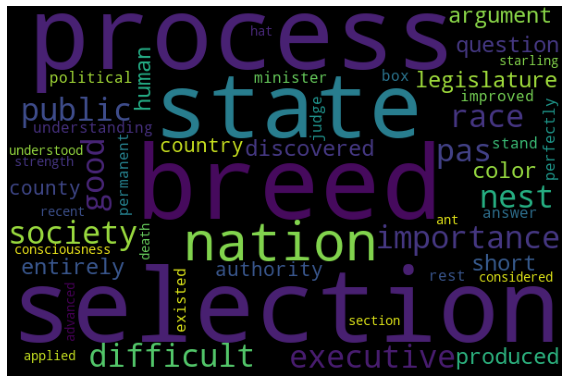

## Attribution

### Code Attribution 
#### Jenifer V.

* Pseudo labeling implementation
* Literature review on pseudo labeling 
* Data crawling for unlabeled data from Reddit and internet search for Reddit labeled data. 
* Data searched for Twitter data. 
* Unlabeled data insights overview using pre-defined diccionary with morality probabilities to oversee the possible results. 
* Simple Random Forest Baseline for comparison.

#### Jennifer C. 
* Complete an EDA for the yelp data and reddit data and complete some meeting notes. (1) 
* Worked on the embedding space baseline for yelp-reviews code-working hours (10 hours). However, here the model's output was identifing if the given reviews were either positive or negative. (2) 
* Fine-tuning algorithm to take into consider moral foundations (25 hours).

#### Zoya

*   Creating subsets of the Yelp and Reddit datasets for use (1 hour) 
*   Data cleaning with tokenization for Yelp dataset (5 hours) 
*   Data cleaning with tokenization for twitter and reddit datasets (2 hours) 
*   EDA for Yelp and Reddit datasets (1 hour) 
*   KNN clustering on Yelp data with Word2Vec (2 hours) 
*   KNN clustering on Twitter data with Word2Vec (1 hour) 
*   KNN clustering on Reddit data with PCA, LSA, and TF-IDF (5 hours) 
*   Built a variational autoencoder that we did not end up using but is on Github (5 hours) 
*   Looking through Project Gutenberg and trying to scrap Twitter (1 hour)

#### Ali
1- Constructing an autoencoder LSTM architecture for unsupervised sentiment analysis and fine tune based on reddit and yelp data base. 
2- Compiling texts from Project Gutenberg, Looking for morality scripts in Project Gutenberg using NLP and techniques of supervised learning (including Deep Learning) and unsupervised learning
3- Using NLP analysin on Yelp data set


### Paper Attribution 

* Abstract -- Jenifer V. and Zoya 
* Introduction -- Zoya 
* Background -- Zoya 
* Data -- Jenifer V. and Zoya 
    * EDA, Data Cleaning, Data Preprocessing and Vectorization -- Zoya 
* Methods 
    * Baseline -- Jenifer V. 
    * Embedding Space -- Jennifer C.
    * KNN -- Zoya 
    * Semi supervised approach -- Jenifer V.
* Evaluation -- Jennifer C. and Zoya 
* Conclusion -- Zoya 
* Appendix -- Ali 


## References



1.  Graham, Jesse, Jonathan Haidt, Sena Koleva, Matt Motyl, Ravi Iyer, Sean P. Wojcik, and Peter H. Ditto. "Moral foundations theory: The pragmatic validity of moral pluralism." In Advances in experimental social psychology, vol. 47, pp. 55-130. Academic Press, 2013. \\
2.  Trager, Jackson, Alireza S. Ziabari, Aida Mostafazadeh Davani, Preni Golazazian, Farzan Karimi-Malekabadi, Ali Omrani, Zhihe Li et al. "The Moral Foundations Reddit Corpus." arXiv preprint arXiv:2208.05545 (2022). \\
3.  Hashemi, Ahmad. “IMDB-Semantic-Sentiment-Analysis” *GitHub*, github.com/towardsNLP/IMDB-Semantic-Sentiment-Analysis/blob/main/Word2Vec/notebooks/W2V_SSA_IMDB_Blog.ipynb. Accessed 22 May 2023.

